<a href="https://colab.research.google.com/github/09sachin/deepLearning/blob/main/18NA30015_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#Resnet

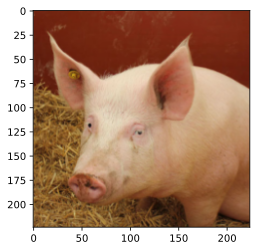

In [ ]:
from PIL import Image
from torchvision import transforms

pig_img = Image.open("pig.jpg")
preprocess = transforms.Compose([
   transforms.Resize(224),
   transforms.ToTensor(),
])
pig_tensor = preprocess(pig_img)[None,:,:,:]

# plot image (note that numpy using HWC whereas Pytorch user CHW, so we need to convert)
plt.imshow(pig_tensor[0].numpy().transpose(1,2,0))

In [ ]:
input_image = Image.open("pig.jpg")
pixel_map = input_image.load()
width, height = input_image.size

In [ ]:
import skimage
from skimage.util import random_noise
from skimage import img_as_float
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline  

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import resnet50

# simple Module to normalize an image
class Normalize(nn.Module):
    def __init__(self, mean, std):
        super(Normalize, self).__init__()
        self.mean = torch.Tensor(mean)
        self.std = torch.Tensor(std)
    def forward(self, x):
        return (x - self.mean.type_as(x)[None,:,None,None]) / self.std.type_as(x)[None,:,None,None]

# values are standard normalization for ImageNet images, 
# from https://github.com/pytorch/examples/blob/master/imagenet/main.py
norm = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# load pre-trained ResNet50, and put into evaluation mode (necessary to e.g. turn off batchnorm)
model = resnet50(pretrained=True)
model.eval();

In [ ]:
# data = []
# for noise_multiplier in range(1, 50, 10):
#   img_1 = img_as_float(img)
#   img_4 = img_1
#   for width in range(1, 350, 50):
#     # img_3 = img_4
#     height = width
#     noise = random_noise(np.zeros([width,height,3]), mode = 'gaussian', mean = 0, var = 1)
#     # for startx in range(0, 400-width):
#     for startx in range(30, 31):
#       # for starty in range(0, 400-width):
#       for starty in range(30, 31):
#         img_3 = img_4
#         for i in range(0, width):
#           for j in range(0, height):
#             for k in range(3):
#               img_3[startx + i, starty + j, k] += noise_multiplier*noise[i, j, k]
#         new_img_1 = Image.fromarray((img_3 * 255).astype(np.uint8))
#         pig_tensor = preprocess(new_img_1)[None,:,:,:]
#         pred = model(norm(pig_tensor))
#         max_class = pred.max(dim=1)[1].item()
#         loss = -nn.CrossEntropyLoss()(pred, torch.LongTensor([341]))
#         data.append([
#                      width, height, 
#                      noise_multiplier, loss, 
#                      imagenet_classes[max_class], nn.Softmax(dim=1)(pred)[0,max_class].item(), 
#                      'hog', nn.Softmax(dim=1)(pred)[0,341].item()
#                      ])        

In [ ]:
def add_gaussian_noise(img, noise, weight):
    gaussian_img = cv2.addWeighted(img, 1, noise, weight, 0)
    return Image.fromarray(gaussian_img.astype('uint8'))
    
def gaussian_noise(img):
    row, col, _ = img.shape
    mean = 0
    var = 1
    sigma = var ** 0.5
    
    return np.random.normal(mean, sigma, (row, col, 3)).astype(np.float32)


In [ ]:
img = cv2.imread("pig.jpg")
img = np.array(img).astype(np.float32)

In [ ]:
data = []
import json
with open("imagenet_class_index.json") as f:
    imagenet_classes = {int(i):x[1] for i,x in json.load(f).items()}
for noise_multiplier in range(1, 100):
  img_1 = img_as_float(img)
  img_4 = img_1
  for width in range(1, 2):
    # img_3 = img_4
    height = width
    # noise = random_noise(np.zeros([400,400,3]), mode = 'gaussian', mean = 0, var = 1)
    noise = gaussian_noise(img)
    image = add_gaussian_noise(img,noise,noise_multiplier)
    # new_img_1 = Image .fromarray((img_3 * 255).astype(np.uint8))
    pig_tensor = preprocess(image)[None,:,:,:]
    pred = model(norm(pig_tensor))
    max_class = pred.max(dim=1)[1].item()
    loss = -nn.CrossEntropyLoss()(pred, torch.LongTensor([341]))
    data.append([
                     width, height, 
                     noise_multiplier, loss, 
                     imagenet_classes[max_class], nn.Softmax(dim=1)(pred)[0,max_class].item(), 
                     'hog', nn.Softmax(dim=1)(pred)[0,341].item()
                     ])
    print("Noise {}, Loss {}, Width {}, Height {}, X {}, Y {}, Prediction {}, True hog".format(noise_multiplier, loss, width, height, 0, 0,imagenet_classes[pred.max(dim=1)[1].item()]))
            

Noise 1, Loss -0.0131310960277915, Width 1, Height 1, X 0, Y 0, Prediction hog, True hog
Noise 2, Loss -0.013654167763888836, Width 1, Height 1, X 0, Y 0, Prediction hog, True hog
Noise 3, Loss -0.02103297971189022, Width 1, Height 1, X 0, Y 0, Prediction hog, True hog
Noise 4, Loss -0.021267225965857506, Width 1, Height 1, X 0, Y 0, Prediction hog, True hog
Noise 5, Loss -0.021779410541057587, Width 1, Height 1, X 0, Y 0, Prediction hog, True hog
Noise 6, Loss -0.020752908661961555, Width 1, Height 1, X 0, Y 0, Prediction hog, True hog
Noise 7, Loss -0.023922491818666458, Width 1, Height 1, X 0, Y 0, Prediction hog, True hog
Noise 8, Loss -0.0190063938498497, Width 1, Height 1, X 0, Y 0, Prediction hog, True hog
Noise 9, Loss -0.017808424308896065, Width 1, Height 1, X 0, Y 0, Prediction hog, True hog
Noise 10, Loss -0.02412801794707775, Width 1, Height 1, X 0, Y 0, Prediction hog, True hog
Noise 11, Loss -0.020087968558073044, Width 1, Height 1, X 0, Y 0, Prediction hog, True hog
Noi

In [ ]:
df = pd.DataFrame(data, columns=['Width', 'Height', 'Noise_Multiplier', 'Loss',
                                'Predicted_Class', 'Predicted_Class_Probability',
                                 'True_Class', 'True_Class_Probability'])

In [ ]:
df.head()

,Width,Height,Noise_Multiplier,Loss,Predicted_Class,Predicted_Class_Probability,True_Class,True_Class_Probability
0,1,1,1,"tensor(-0.0131, grad_fn=<NegBackward0>)",hog,0.986955,hog,0.986955
1,1,1,2,"tensor(-0.0137, grad_fn=<NegBackward0>)",hog,0.986439,hog,0.986439
2,1,1,3,"tensor(-0.0210, grad_fn=<NegBackward0>)",hog,0.979187,hog,0.979187
3,1,1,4,"tensor(-0.0213, grad_fn=<NegBackward0>)",hog,0.978957,hog,0.978957
4,1,1,5,"tensor(-0.0218, grad_fn=<NegBackward0>)",hog,0.978456,hog,0.978456


In [ ]:
df[(df.Width == 1)]

,Width,Height,Noise_Multiplier,Loss,Predicted_Class,Predicted_Class_Probability,True_Class,True_Class_Probability
4,201,201,1,"tensor(-0.0170, grad_fn=<NegBackward0>)",hog,0.983124,hog,0.983124
11,201,201,11,"tensor(-0.0152, grad_fn=<NegBackward0>)",hog,0.984937,hog,0.984937
18,201,201,21,"tensor(-0.0185, grad_fn=<NegBackward0>)",hog,0.981655,hog,0.981655
25,201,201,31,"tensor(-0.0136, grad_fn=<NegBackward0>)",hog,0.986534,hog,0.986534
32,201,201,41,"tensor(-0.0172, grad_fn=<NegBackward0>)",hog,0.982902,hog,0.982902


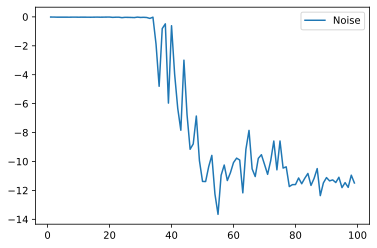

In [ ]:
# plt.plot(df[(df.Noise_Multiplier == 2)]['Predicted_Class_Probability'], label = 'Predicted')
plt.plot(df[(df.Width == 1)]['Noise_Multiplier'], df[(df.Width == 1)]['Loss'], label = 'Noise')
plt.legend()
plt.show()

#Logistic Regression

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                              ]), 
                            download=True)
test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,))
                              ]), 
                           download=True)

In [ ]:
batch_size = 100
n_iters = 3000
epochs = n_iters / (len(train_dataset) / batch_size)
input_dim = 784
output_dim = 10
lr_rate = 0.001

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

In [ ]:
model = LogisticRegression(input_dim, output_dim)

In [ ]:
criterion = torch.nn.CrossEntropyLoss() # computes softmax and then the cross entropy

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

In [ ]:
iter = 0
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter+=1
        if iter%500==0:
            correct = 0
            total = 0
            model.eval()
            with torch.no_grad():
              for images, labels in test_loader:
                  images = Variable(images.view(-1, 28*28))
                  outputs = model(images)
                  _, predicted = torch.max(outputs.data, 1)
                  total+= labels.size(0)
                  # for gpu, bring the predicted and labels back to cpu fro python operations to work
                  correct+= (predicted == labels).sum()
            accuracy = 100 * correct/total
            print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter, loss.item(), accuracy))
            model.train()

Iteration: 500. Loss: 0.8095375895500183. Accuracy: 82.8499984741211.
Iteration: 1000. Loss: 0.591385543346405. Accuracy: 86.33000183105469.
Iteration: 1500. Loss: 0.5389863848686218. Accuracy: 87.37999725341797.
Iteration: 2000. Loss: 0.49552151560783386. Accuracy: 88.05999755859375.
Iteration: 2500. Loss: 0.4509654641151428. Accuracy: 88.54000091552734.
Iteration: 3000. Loss: 0.4612128734588623. Accuracy: 88.95999908447266.


In [ ]:
test_image, label = test_dataset[1]

label:  2


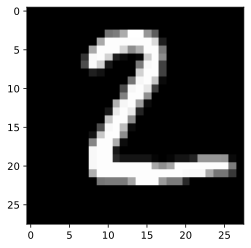

In [ ]:
print("label: ",label)
img = test_image.detach().numpy()[0]
plt.imshow(img, cmap='gray')

In [ ]:
pred = model(test_image.view(28*28))
out = torch.argmax(pred)
prob = nn.Softmax(dim=0)(pred)[label].item()
print(out.item(), img.shape[1], img.shape[0], "grayscale", prob*100)

2 28 28 grayscale 72.46163487434387


In [ ]:
img = np.array(img).astype(np.float32)

In [ ]:
noise = np.random.normal(0, 1, (img.shape[0], img.shape[1])).astype(np.float32)
predicted_class = []
predicted_class_prob =[]
true_class_prob = []
step_size = 0.05
weight = 0

In [ ]:
print("Pertubation Step size = {}\n".format(step_size))
print("Width = {}, Height = {}, color = {}".format(8, 8, 1))
print("wt, cls, loss, prob")
model.eval()
with torch.no_grad():
    for i in range(1,100):
        weight = weight+step_size
        image = cv2.addWeighted(img, 1, noise, weight, 0)
        test_image = transforms.ToTensor()(image)
        pred = model(test_image.view(28*28))
        max_class = torch.argmax(pred).item()
        true_class_prob.append(nn.Softmax(dim=0)(pred)[label].item())
        predicted_class.append(max_class)
        predicted_class_prob.append(nn.Softmax(dim=0)(pred)[max_class].item())
        print(i, max_class, 
              nn.CrossEntropyLoss()(torch.reshape(pred, (1,10)),torch.LongTensor([label])).item(), 
              predicted_class_prob[i-1])

Pertubation Step size = 0.05

Width = 8, Height = 8, color = 1
wt, cls, loss, prob
1 2 0.3161541223526001 0.728947103023529
2 2 0.3105500042438507 0.7330436706542969
3 2 0.3052959740161896 0.7369052171707153
4 2 0.30038660764694214 0.740531861782074
5 2 0.2958177626132965 0.743923008441925
6 2 0.2915847897529602 0.7470786571502686
7 2 0.28768497705459595 0.7499978542327881
8 2 0.2841145694255829 0.7526804208755493
9 2 0.2808714509010315 0.7551254034042358
10 2 0.27795279026031494 0.7573325634002686
11 2 0.2753567099571228 0.7593012452125549
12 2 0.2730821967124939 0.7610302567481995
13 2 0.271128386259079 0.762518584728241
14 2 0.2694946825504303 0.7637653350830078
15 2 0.2681809365749359 0.7647693753242493
16 2 0.26718780398368835 0.7655292749404907
17 2 0.2665160000324249 0.7660437226295471
18 2 0.26616719365119934 0.76631098985672
19 2 0.2661426067352295 0.766329824924469
20 2 0.2664450407028198 0.7660980820655823
21 2 0.2670769989490509 0.7656140923500061
22 2 0.26804134249687195 0

True class probabiluty vs weight of added noise



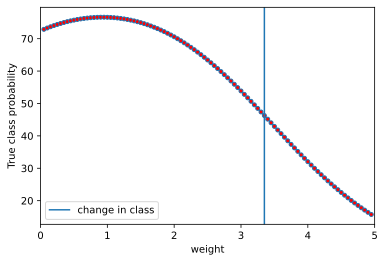

In [ ]:
x = []
cic = len(predicted_class)-1
for i in range(98,-1,-1):
  x.append((99-i)*step_size)
  if predicted_class[i]!=label:
    cic = i
cic += 1 # weigt is one more than index
print("True class probabiluty vs weight of added noise\n")
plt.plot(x,np.array(true_class_prob)*100, marker='o', markerfacecolor='red', markersize=4)
plt.axvline(x = cic*step_size, label="change in class")
plt.xlim(0,100*step_size)
# # plt.ylim(0,100)
plt.xlabel('weight')
plt.ylabel('True class probability')
plt.legend()
plt.show()

#SVM

In [ ]:
from sklearn import svm
from sklearn.datasets import load_digits, fetch_openml
from sklearn.preprocessing import normalize as norm
from sklearn.metrics import hinge_loss
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
X,y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
X = np.array(norm(X)).astype(np.float32)
x_test = X[20000:25000]
X = X[:20000]
y_test = y[20000:25000]
y = y[:20000]

In [ ]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')
clf.fit(X,y)

total = len(y_test)
pred = clf.predict(x_test)
correct = (pred==y_test).sum()
print("Accuracy = {}".format(correct/total))

Accuracy = 0.9336


['3'] 3


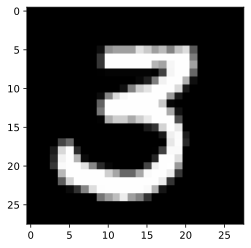

In [ ]:
test_index = 1261
print(clf.predict([x_test[test_index]]), y_test[test_index] )
plt.imshow(x_test[test_index].reshape(28,28), cmap="gray")

In [ ]:
noise = np.random.normal(0, 1, 784).astype(np.float32)
predicted_class = []
predicted_class_prob =[]
true_class_prob = []
step_size = 0.005
weight = 0
img = x_test[test_index]
label = y_test[test_index]
labels = np.array([str(i) for i in range(0,10)])

In [ ]:
print("Pertubation Step size = {}\n".format(step_size))
print("Width = {}, Height = {}, color = {}".format(28, 28, 1))
print("wt, cls, loss, prob")

for i in range(1,100):
    weight = weight+step_size
    image = img + weight*noise
    pred = clf.predict([image])
    pred_class = int(pred[0])
    p = np.array(clf.decision_function([image]))
    prob = np.exp(p)/np.sum(np.exp(p),axis=1, keepdims=True) # softmax after the voting
    true_class_prob.append(prob[0][int(label)])
    predicted_class.append(pred_class)
    predicted_class_prob.append(prob[0][pred_class])
    print(i, pred_class, prob[0][pred_class], hinge_loss([label], p, labels=labels))

Pertubation Step size = 0.005

Width = 28, Height = 28, color = 1
wt, cls, loss, prob
1 3 0.6541054105333991 0.0
2 3 0.653595561305872 0.0
3 3 0.6514572944451444 0.0
4 3 0.6511704532101458 0.0
5 3 0.6424161525104651 0.0
6 3 0.6419872939167206 0.0
7 3 0.6416148981983236 0.0
8 3 0.640626021356487 0.0
9 3 0.640102049939525 0.0
10 3 0.639434496327614 0.0
11 3 0.6387083089770716 0.0
12 3 0.6382042822023747 0.0
13 3 0.6378280254395587 0.0
14 3 0.6375333889976861 0.0
15 3 0.6372956535812716 0.0
16 3 0.6371002147132673 0.0
17 8 0.6365396175256377 1.9989533869043896
18 8 0.6365688520492078 1.9993865565890179
19 8 0.6366112116529076 1.9997950143026504
20 8 0.6366644842622541 2.000180979719767
21 8 0.6473773789624258 2.00054641537986
22 8 0.6473148672825145 2.000893063370757
23 8 0.6472623902514048 2.0012224757506587
24 8 0.6472185679880784 2.001536038682694
25 8 0.6471823106172604 2.001834997869196
26 8 0.6471527562060586 2.002120468761998
27 8 0.6471292273720813 2.0023934614059318
28 8 0.647111

True class probabiluty vs weight of added noise



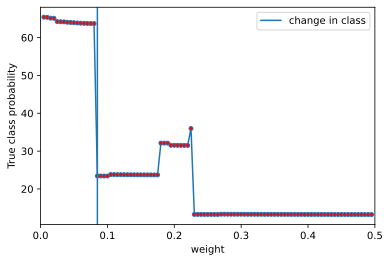

In [ ]:
x = []
cic = len(predicted_class)-1
for i in range(98,-1,-1):
  x.append((99-i)*step_size)
  if predicted_class[i]!=int(label):
    cic = i
cic += 1 # weigt is one more than index
print("True class probabiluty vs weight of added noise\n")
plt.plot(x,np.array(true_class_prob)*100, marker='o', markerfacecolor='red', markersize=4)
plt.axvline(x = cic*step_size, label="change in class")
plt.xlim(0,100*step_size)
# # plt.ylim(0,100)
plt.xlabel('weight')
plt.ylabel('True class probability')
plt.legend()
plt.show()